# The Impact of Demographic Factors on the Occurrence of Cancer
## Exploratory Data Analysis
#### Szymon Abramczyk, Sonia Bogdańska



Demographic and health data for various regions

Data source: https://www.kaggle.com/datasets/varunraskar/cancer-regression

## Table of Contents
1. [Data Import and Preliminary Information](#info)
2. [Relationships Between Data](#relationships)
3. [Ranges and Variability of Data](#ranges)
4. [Data Completeness](#completeness)
5. [Visualizations](#visualizations)







## 1. Data Import and Preliminary Information <a name="info"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import geopandas as gpd
from matplotlib.ticker import FuncFormatter
from shapely.geometry import Polygon

In [2]:
avg_household_size = pd.read_csv('avg-household-size.csv')
cancer_reg = pd.read_csv('cancer_reg.csv')

Displaying basic information about the data:

In [3]:
avg_household_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


Column Descriptions for **avg_household_size**:

* *statefips*: FIPS code representing the state.
* *countyfips*: FIPS code representing the county or census area within the state.
* *avghouseholdsize*: Average household size in the region.
* *geography*: Geographic location, typically represented as the county or census area name along with the state name.

In [4]:
avg_household_size.head()

statefips  countyfips  avghouseholdsize                           geography
0          2          13              2.43      Aleutians East Borough, Alaska
1          2          16              3.59  Aleutians West Census Area, Alaska
2          2          20              2.77      Anchorage Municipality, Alaska
3          2          50              3.86          Bethel Census Area, Alaska
4          2          60              2.50         Bristol Bay Borough, Alaska

In [5]:
avg_household_size.nunique()

statefips             52
countyfips           325
avghouseholdsize     175
geography           3220
dtype: int64

In [6]:
pd.set_option('display.max_rows', None)
cancer_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   deathrate                3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

**Column Descriptions for `cancer_reg`**:

- *avganncount*: Average number of reported cancer cases diagnosed annually in the county.
- *avgdeathsperyear*: Average number of reported cancer deaths per year in the county.
- *deathrate*: Dependent variable. Average number of deaths per 100,000 residents due to cancer in the county.
- *incidencerate*: Average number of cancer diagnoses per 100,000 residents in the county.
- *medincome*: Median household income in the county.
- *popest2015*: Population of the county in 2015.
- *povertypercent*: Percentage of the county's population living below the poverty line.
- *studypercap*: Number of cancer-related clinical studies per capita in the county.
- *binnedinc*: Median household income grouped into decile ranges.
- *medianage*: Median age of residents in the county.
- *medianagemale*: Median age of males in the county.
- *medianagefemale*: Median age of females in the county.
- *geography*: County name.
- *percentmarried*: Percentage of county residents who are married.
- *pctnohs18_24*: Percentage of residents aged 18–24 who did not complete high school.
- *pcths18_24*: Percentage of residents aged 18–24 with a high school education.
- *pctsomecol18_24*: Percentage of residents aged 18–24 with some college education.
- *pctbachdeg18_24*: Percentage of residents aged 18–24 with a bachelor's degree.
- *pcths25_over*: Percentage of residents aged 25 and over with a high school education.
- *pctbachdeg25_over*: Percentage of residents aged 25 and over with a bachelor's degree.
- *pctemployed16_over*: Percentage of residents aged 16 and over who are employed.
- *pctunemployed16_over*: Percentage of residents aged 16 and over who are unemployed.
- *pctprivatecoverage*: Percentage of county residents with private health insurance.
- *pctprivatecoveragealone*: Percentage of county residents with only private health insurance (without public assistance).
- *pctempprivcoverage*: Percentage of county residents with employer-provided private health insurance.
- *pctpubliccoverage*: Percentage of county residents with government-provided health insurance.
- *pctpubliccoveragealone*: Percentage of county residents with only public health insurance.
- *pctwhite*: Percentage of county residents identifying as white.
- *pctblack*: Percentage of county residents identifying as Black.
- *pctasian*: Percentage of county residents identifying as Asian.
- *pctotherrace*: Percentage of county residents identifying as another race (not white, Black, or Asian).
- *pctmarriedhouseholds*: Percentage of households in the county where residents are married.
- *birthrate*: Number of live births relative to the number of women in the county.

In [7]:
pd.set_option('display.max_columns', None)
cancer_reg.head()

avganncount  avgdeathsperyear  deathrate  incidencerate  medincome  \
0       1397.0               469      164.9          489.8      61898   
1        173.0                70      161.3          411.6      48127   
2        102.0                50      174.7          349.7      49348   
3        427.0               202      194.8          430.4      44243   
4         57.0                26      144.4          350.1      49955   

   popest2015  povertypercent  studypercap           binnedinc  medianage  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   medianagemale  medianagefemale                     geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   percentmarried  pctnohs18_24  pcths18_24  pctsomecol18_24  pctbachdeg18_24  \
0            52.5          11.5        39.5             42.1              6.9   
1            44.5           6.1        22.4             64.0              7.5   
2            54.2          24.0        36.6              NaN              9.5   
3            52.7          20.2        41.2             36.1              2.5   
4            57.8          14.9        43.0             40.0              2.0   

   pcths25_over  pctbachdeg25_over  pctemployed16_over  pctunemployed16_over  \
0          23.2               19.6                51.9                   8.0   
1          26.0               22.7                55.9                   7.8   
2          29.0               16.0                45.9                   7.0   
3          31.6                9.3                48.3                  12.1   
4          33.4               15.0                48.2                   4.8   

   pctprivatecoverage  pctprivatecoveragealone  pctempprivcoverage  \
0                75.1                      NaN                41.6   
1                70.2                     53.8                43.6   
2                63.7                     43.5                34.9   
3                58.4                     40.3                35.0   
4                61.6                     43.9                35.1   

   pctpubliccoverage  pctpubliccoveragealone   pctwhite  pctblack  pctasian  \
0               32.9                    14.0  81.780529  2.594728  4.821857   
1               31.1                    15.3  89.228509  0.969102  2.246233   
2               42.1                    21.1  90.922190  0.739673  0.465898   
3               45.3                    25.0  91.744686  0.782626  1.161359   
4               44.0                    22.7  94.104024  0.270192  0.665830   

   pctotherrace  pctmarriedhouseholds  birthrate  
0      1.843479             52.856076   6.118831  
1      3.741352             45.372500   4.333096  
2      2.747358             54.444868   3.729488  
3      1.362643             51.021514   4.603841  
4      0.492135             54.027460   6.796657

### Merging Tables

Data on the average household size in the region can be merged with the main table based on the regions in the 'geography' column.

In [8]:
df = cancer_reg.merge(avg_household_size, on='geography', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   deathrate                3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

The table has 36 columns and 3047 rows. Except for two columns of type object: 'binnedinc' and 'geography', all columns are numeric. The data type in the 'statefips' and 'countyfips' columns can be changed to object, as they are identifiers rather than numerical values for statistical analysis. Leaving them as integers could lead to misinterpretations during visualization.

In [9]:
df['statefips'] = df['statefips'].astype('object')
df['countyfips'] = df['countyfips'].astype('object')

In [10]:
df.describe()

avganncount  avgdeathsperyear    deathrate  incidencerate  \
count   3047.000000       3047.000000  3047.000000    3047.000000   
mean     606.338544        185.965868   178.664063     448.268586   
std     1416.356223        504.134286    27.751511      54.560733   
min        6.000000          3.000000    59.700000     201.300000   
25%       76.000000         28.000000   161.200000     420.300000   
50%      171.000000         61.000000   178.100000     453.549422   
75%      518.000000        149.000000   195.200000     480.850000   
max    38150.000000      14010.000000   362.800000    1206.900000   

           medincome    popest2015  povertypercent  studypercap    medianage  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       medianagemale  medianagefemale  percentmarried  pctnohs18_24  \
count    3047.000000      3047.000000     3047.000000   3047.000000   
mean       39.570725        42.145323       51.773679     18.224450   
std         5.226017         5.292849        6.896928      8.093064   
min        22.400000        22.300000       23.100000      0.000000   
25%        36.350000        39.100000       47.750000     12.800000   
50%        39.600000        42.400000       52.400000     17.100000   
75%        42.500000        45.300000       56.400000     22.700000   
max        64.700000        65.700000       72.500000     64.100000   

        pcths18_24  pctsomecol18_24  pctbachdeg18_24  pcths25_over  \
count  3047.000000       762.000000      3047.000000   3047.000000   
mean     35.002068        40.977034         6.158287     34.804660   
std       9.069722        11.115805         4.529059      7.034924   
min       0.000000         7.100000         0.000000      7.500000   
25%      29.200000        34.000000         3.100000     30.400000   
50%      34.700000        40.400000         5.400000     35.300000   
75%      40.700000        46.400000         8.200000     39.650000   
max      72.500000        79.000000        51.800000     54.800000   

       pctbachdeg25_over  pctemployed16_over  pctunemployed16_over  \
count        3047.000000         2895.000000           3047.000000   
mean           13.282015           54.152642              7.852412   
std             5.394756            8.315064              3.452371   
min             2.500000           17.600000              0.400000   
25%             9.400000           48.600000              5.500000   
50%            12.300000           54.500000              7.600000   
75%            16.100000           60.300000              9.700000   
max            42.200000           80.100000             29.400000   

       pctprivatecoverage  pctprivatecoveragealone  pctempprivcoverage  \
count         3047.000000              2438.000000         3047.000000   
mean            64.354939                48.453774           41.196324   
std             10.647057                10.083006            9.447687   
min             22.300000                15.700000           13.500000   
25%             57.200000                41.000000           34.500000   
50%             65.100000                48.700000           41.100000   
75%             72.100000                55.600000           47.700000   
max             92.300000                78.900000           70.700000   

       pctpubliccoverage  pctpubliccoveragealone     pctwhite     pctblack  \
count        3047.

Checking unique values for object-type data:

In [11]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Column {column} - Unique values: {df[column].unique()}")

Column binnedinc - Unique values: ['(61494.5, 125635]' '(48021.6, 51046.4]' '(42724.4, 45201]'
 '(51046.4, 54545.6]' '(37413.8, 40362.7]' '(40362.7, 42724.4]'
 '(54545.6, 61494.5]' '(34218.1, 37413.8]' '[22640, 34218.1]'
 '(45201, 48021.6]']
Column geography - Unique values: ['Kitsap County, Washington' 'Kittitas County, Washington'
 'Klickitat County, Washington' ... 'Ford County, Kansas'
 'Franklin County, Kansas' 'Geary County, Kansas']
Column statefips - Unique values: [53 54 55 31 32 33 34 35 36 51 26 27 37 38 1 5 6 30 47 48 22 23 24 25 49
 50 8 56 28 29 20 21 9 10 11 12 40 41 39 42 44 45 18 19 13 15 16 17 2 4 46]
Column countyfips - Unique values: [35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 1 3 5 7
 9 11 13 15 17 19 21 23 25 27 29 31 33 79 81 83 85 87 89 91 93 95 97 99
 101 103 105 107 109 159 161 163 167 169 173 175 177 179 181 185 510 6 28
 111 113 115 117 119 121 125 127 131 133 135 137 139 141 143 145 147 149
 153 155 157 165 171 183 187 191 193 195 197

The `binnedinc` column contains income ranges, written as text in the format, e.g., '(61494.5, 125635]'. Our data also includes information on the median household income in the region, which is easier to interpret, so the `binnedinc` column will likely not be needed.

## 2. Relationships Between Data <a name="relationships"></a>

#### Correlation Matrix

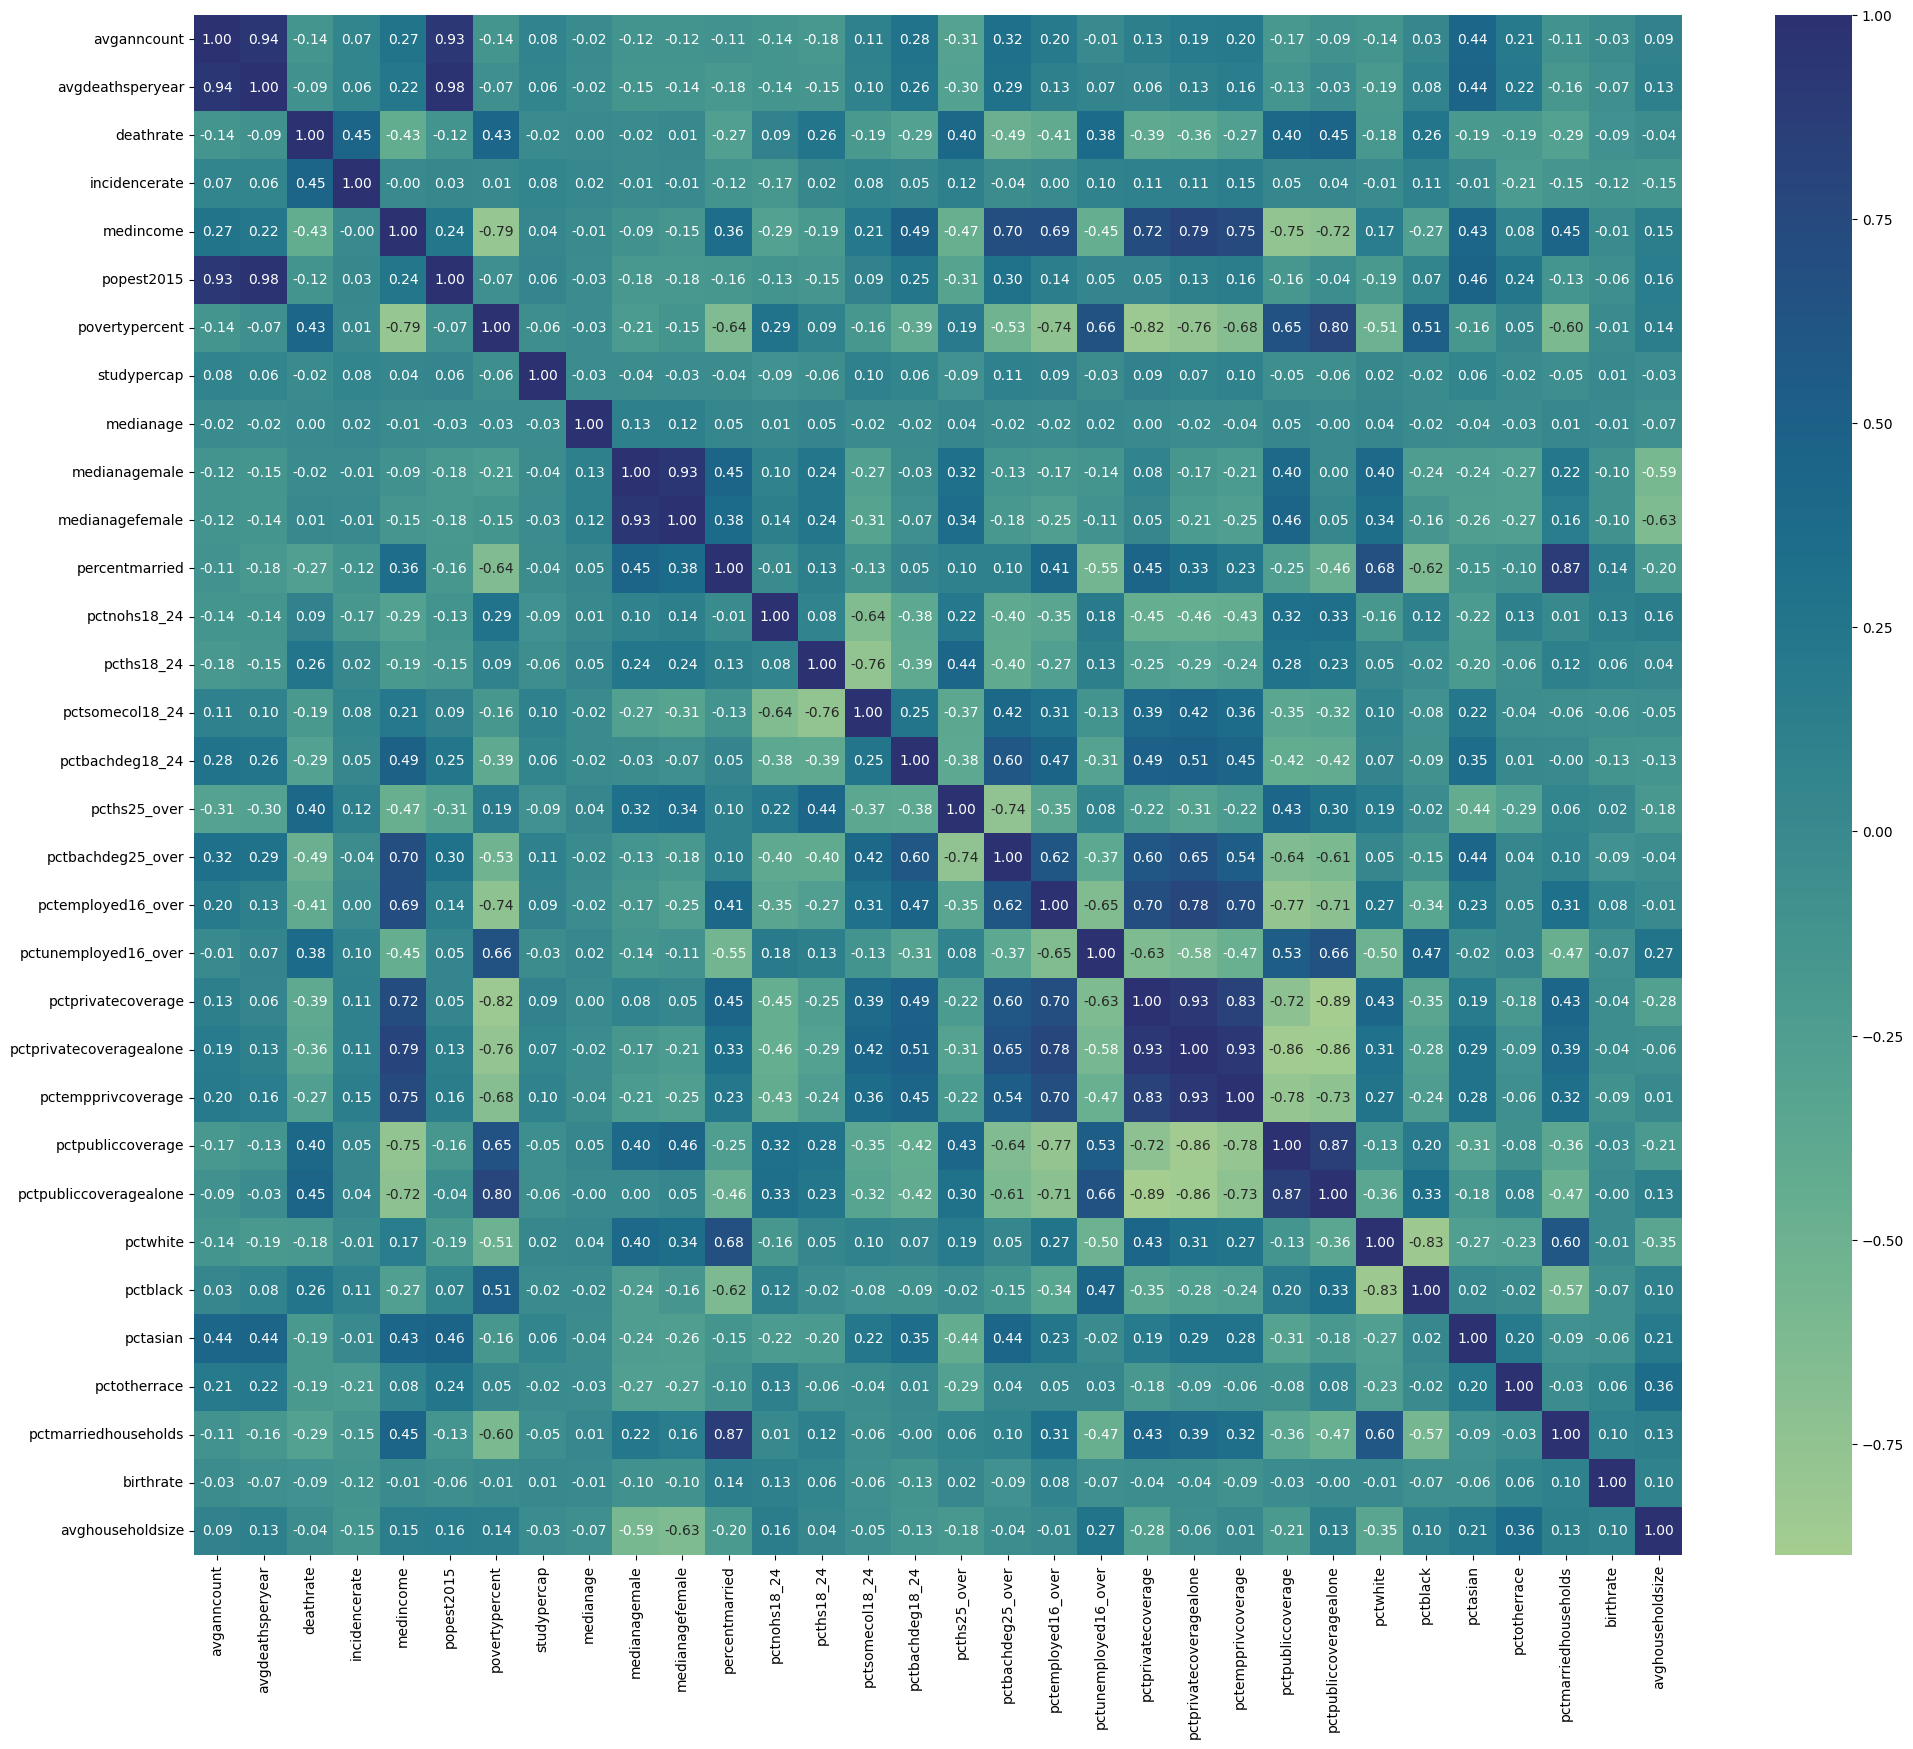

In [12]:
df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='crest')
plt.show()

As the dependent variable, it makes sense to choose one of the rate-type variables (`deathrate` or `incidencerate`). These are the number of cases (diagnoses or deaths) per 100,000 residents, and thus they are not directly dependent on the population size in the region.

Looking at the correlation matrix, it can be seen that `incidencerate` has significantly lower linear correlation coefficients with other variables than `deathrate`, making it harder to analyze the impact of other variables on this variable. Therefore, we will focus on `deathrate`, the coefficient of deaths due to malignant tumors.

Below, we define a function to find pairs of highly correlated features. Its use will allow us to find features that are highly dependent on each other, the use of which could lead to overfitting the model. In such cases, often both features are not needed, as they provide similar information.

In [13]:
def get_highly_correlated_features(corr_matrix, threshold=0.7):
    corr_pairs = corr_matrix.unstack()
    high_corr_pairs = corr_pairs[(abs(corr_pairs) > threshold) & (corr_pairs != 1)]
    high_corr_df = pd.DataFrame(high_corr_pairs).reset_index()
    high_corr_df.columns = ['Feature1', 'Feature2', 'Correlation']
    high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)
    high_corr_df['sorted_pair'] = high_corr_df.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
    high_corr_df = high_corr_df.drop_duplicates(subset='sorted_pair')
    high_corr_df = high_corr_df.drop(columns='sorted_pair')
    return high_corr_df

In [14]:
high_corr_features = get_highly_correlated_features(corr_matrix, threshold=0.7)
print("Pairs of features with high absolute correlation (threshold > 0.7):")
print(high_corr_features)

Pairs of features with high absolute correlation (threshold > 0.7):
                   Feature1                 Feature2  Correlation
12               popest2015         avgdeathsperyear     0.977634
0               avganncount         avgdeathsperyear     0.939408
19          medianagefemale            medianagemale     0.933696
40  pctprivatecoveragealone       pctprivatecoverage     0.933496
47       pctempprivcoverage  pctprivatecoveragealone     0.929105
11               popest2015              avganncount     0.926894
65     pctmarriedhouseholds           percentmarried     0.870261
62   pctpubliccoveragealone        pctpubliccoverage     0.865833
46       pctempprivcoverage       pctprivatecoverage     0.827459
57   pctpubliccoveragealone           povertypercent     0.798642
37  pctprivatecoveragealone                medincome     0.788048
39  pctprivatecoveragealone       pctemployed16_over     0.782595
8                 medincome       pctempprivcoverage     0.747294
31      

In [15]:
np.fill_diagonal(corr_matrix.values, np.nan)

max_corr = corr_matrix.max().max()
min_corr_close_to_zero = corr_matrix.abs().min().min()

max_corr_pair = corr_matrix.stack().idxmax()
min_corr_pair = corr_matrix.abs().stack().sub(min_corr_close_to_zero).abs().idxmin()

print("Most correlated attributes:", max_corr_pair, "with correlation:", max_corr)
print("Attributes with the least linear dependence:", min_corr_pair, "with correlation:", min_corr_close_to_zero)

Most correlated attributes: ('avgdeathsperyear', 'popest2015') with correlation: 0.9776340555232121
Attributes with the least linear dependence: ('pctbachdeg18_24', 'pctmarriedhouseholds') with correlation: 0.0001044447187198542


**Interpretation of the Strongest Linear Dependencies:**
- The number of cancer deaths (`avgdeathsperyear`) is strongly correlated with the population in 2015 (`popest2015`). This relationship is predictable, as a larger population will result in more cancer cases and deaths.
- The average number of cancer cases (`avganncount`) is strongly correlated with the number of deaths (`avgdeathsperyear`), confirming the link between the number of diagnoses and mortality.
- The median age of women and men is strongly correlated, indicating a similar demographic structure.
- The percentage of the population with only private insurance is strongly correlated with the overall percentage of people with private insurance.
- The percentage of the population with employer-provided insurance is linked to private insurance, as most private insurance comes from employer-provided plans.
- A higher percentage of people using only public insurance results in a lower percentage of people with private insurance, hence the strong negative correlation between them.
- A strong negative correlation between the percentage of people below the poverty line and median income. This is a logical conclusion from economics: regions with higher incomes have a lower percentage of people living in poverty.

**Potential Data Redundancy:**
- *popest2015*, *avganncount*, *avgdeathsperyear*: The population in the region is strongly correlated with the number of cases and deaths. To avoid redundancy and misinterpretation in the regression model, features normalized relative to the population, such as *deathrate* or *incidencerate*, should be considered.
- *medianagemale*, *medianagefemale*: The age of men and women is very similar, so only the *medianage* feature, which includes both genders, may be sufficient for the regression model.

In [16]:
corr_deathrate = pd.DataFrame(corr_matrix["deathrate"].copy())
corr_deathrate["deathrate_abs"] = abs(corr_matrix["deathrate"])


print(corr_deathrate.sort_values(by="deathrate_abs", ascending=False))

                         deathrate  deathrate_abs
pctbachdeg25_over        -0.485477       0.485477
incidencerate             0.449432       0.449432
pctpubliccoveragealone    0.449358       0.449358
povertypercent            0.429389       0.429389
medincome                -0.428615       0.428615
pctemployed16_over       -0.412046       0.412046
pcths25_over              0.404589       0.404589
pctpubliccoverage         0.404572       0.404572
pctprivatecoverage       -0.386066       0.386066
pctunemployed16_over      0.378412       0.378412
pctprivatecoveragealone  -0.363704       0.363704
pctmarriedhouseholds     -0.293325       0.293325
pctbachdeg18_24          -0.287817       0.287817
pctempprivcoverage       -0.267399       0.267399
percentmarried           -0.266820       0.266820
pcths18_24                0.261976       0.261976
pctblack                  0.257024       0.257024
pctotherrace             -0.189894       0.189894
pctsomecol18_24          -0.188688       0.188688


As can be seen, the variables most strongly linearly correlated with `deathrate` are related to education level, type of insurance, income, and poverty.

## 3. Ranges and Variability of Data <a name="ranges"></a>


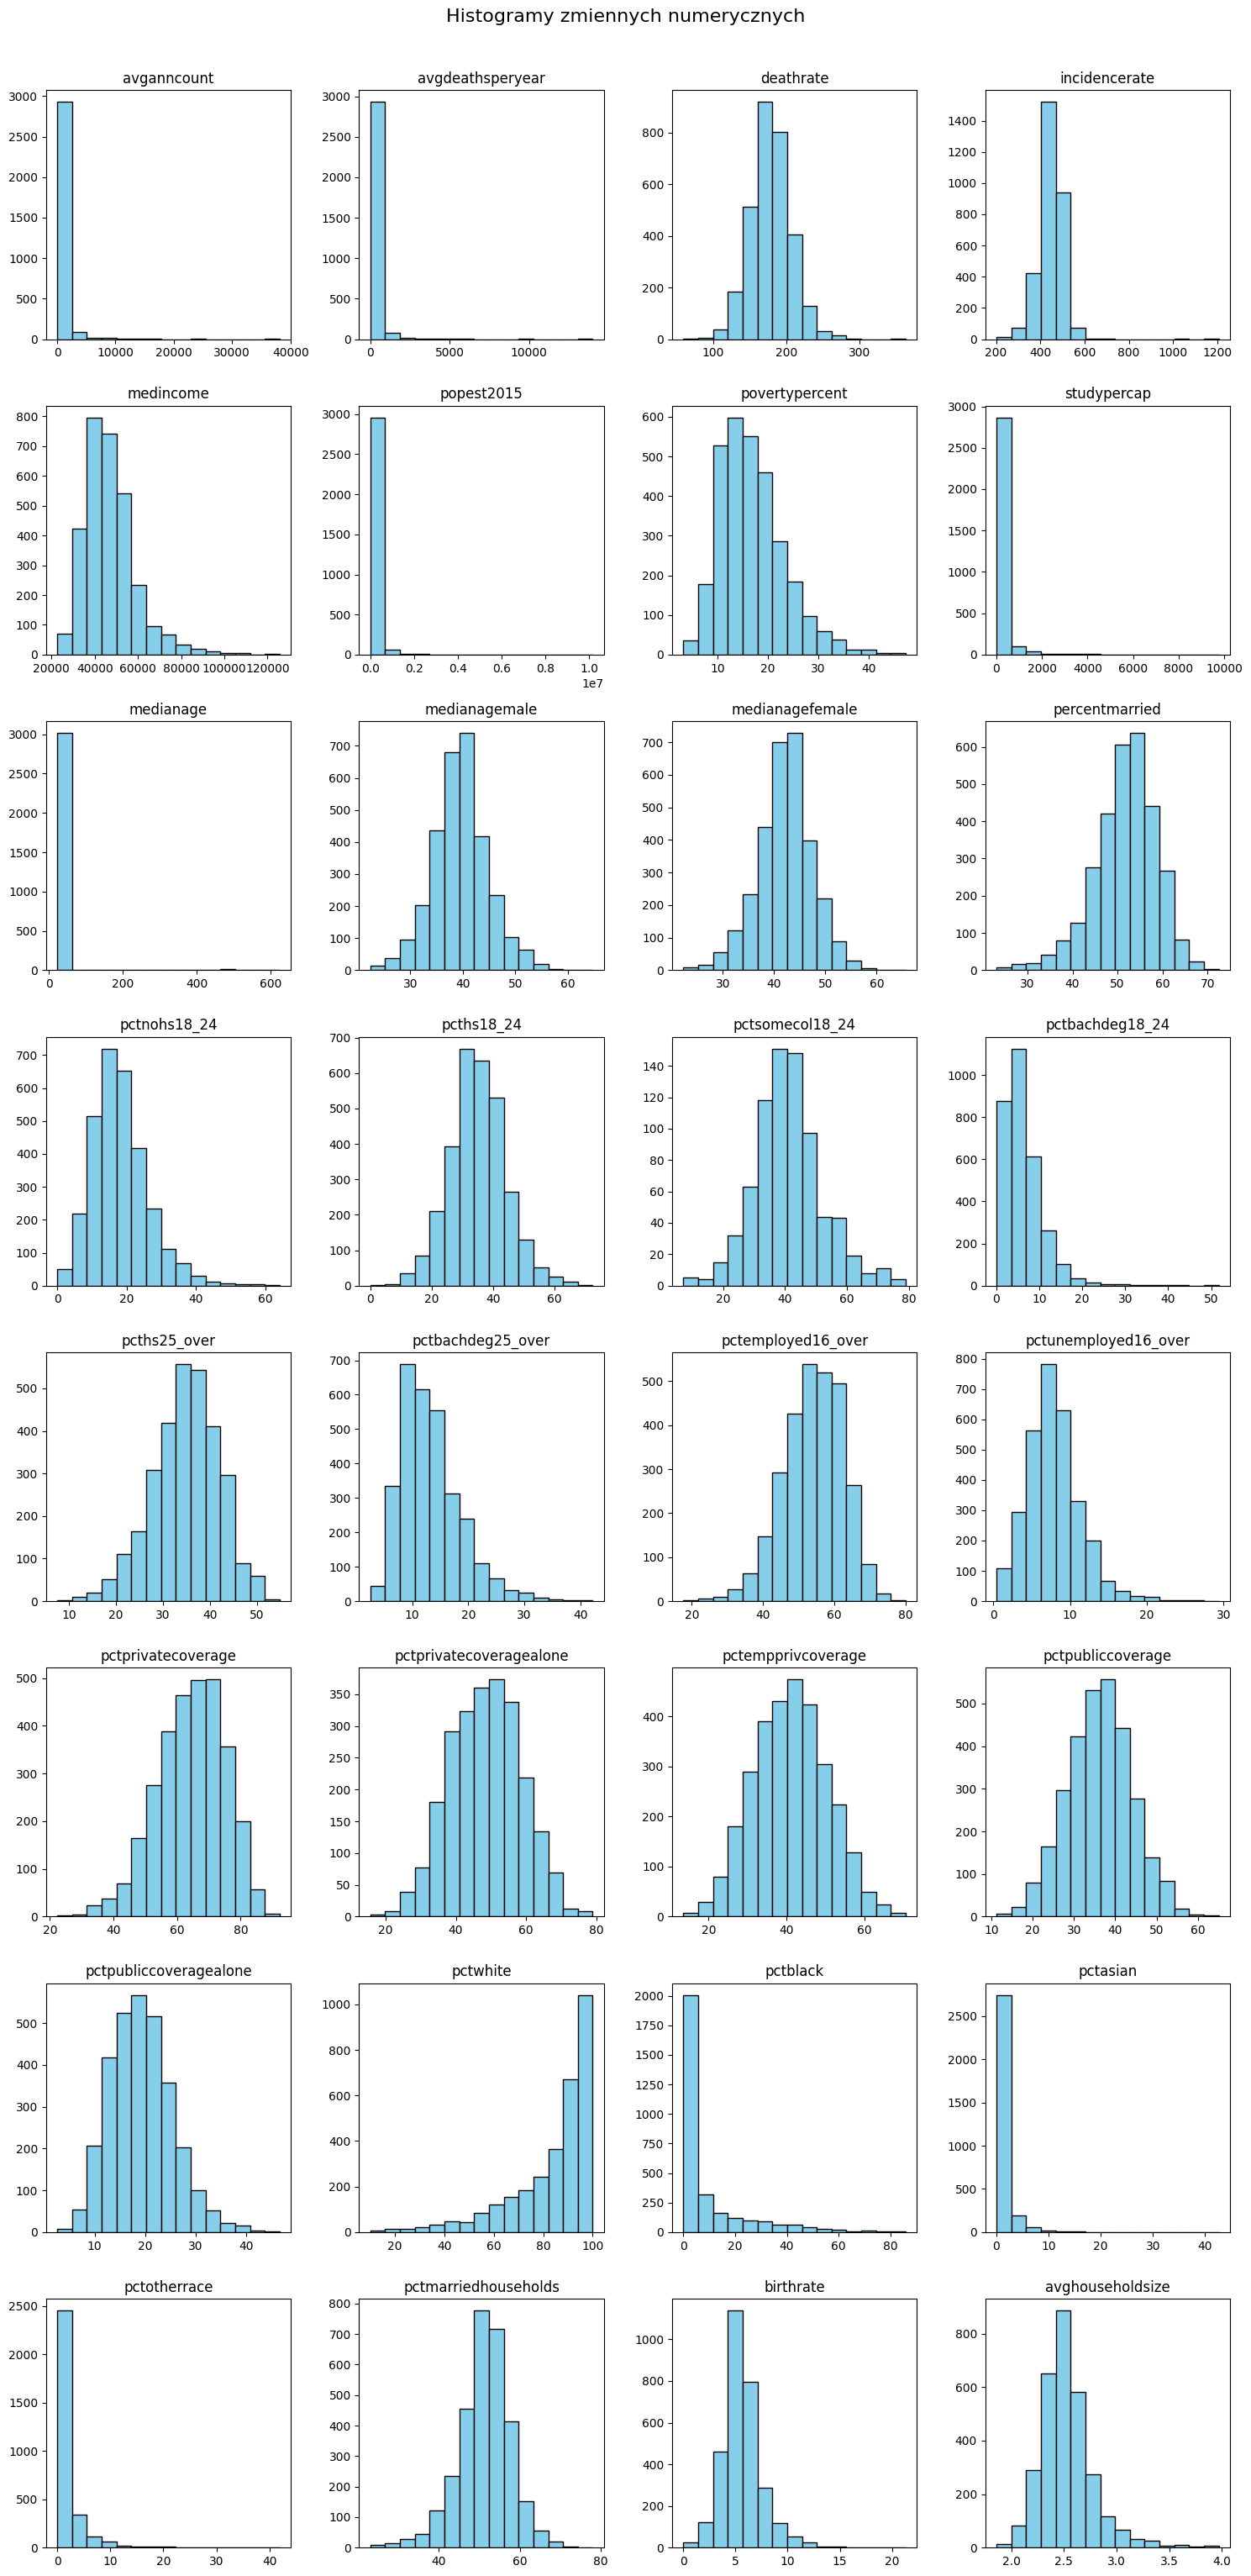

In [17]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

columns_per_row = 4
num_plots = len(numerical_columns)
num_rows = (num_plots + columns_per_row - 1) // columns_per_row

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 30))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column].dropna(), bins=15, color='skyblue', edgecolor='black')
    axes[i].set_title(column)

for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Histogramy zmiennych numerycznych", y=1.02, fontsize=16)
plt.show()


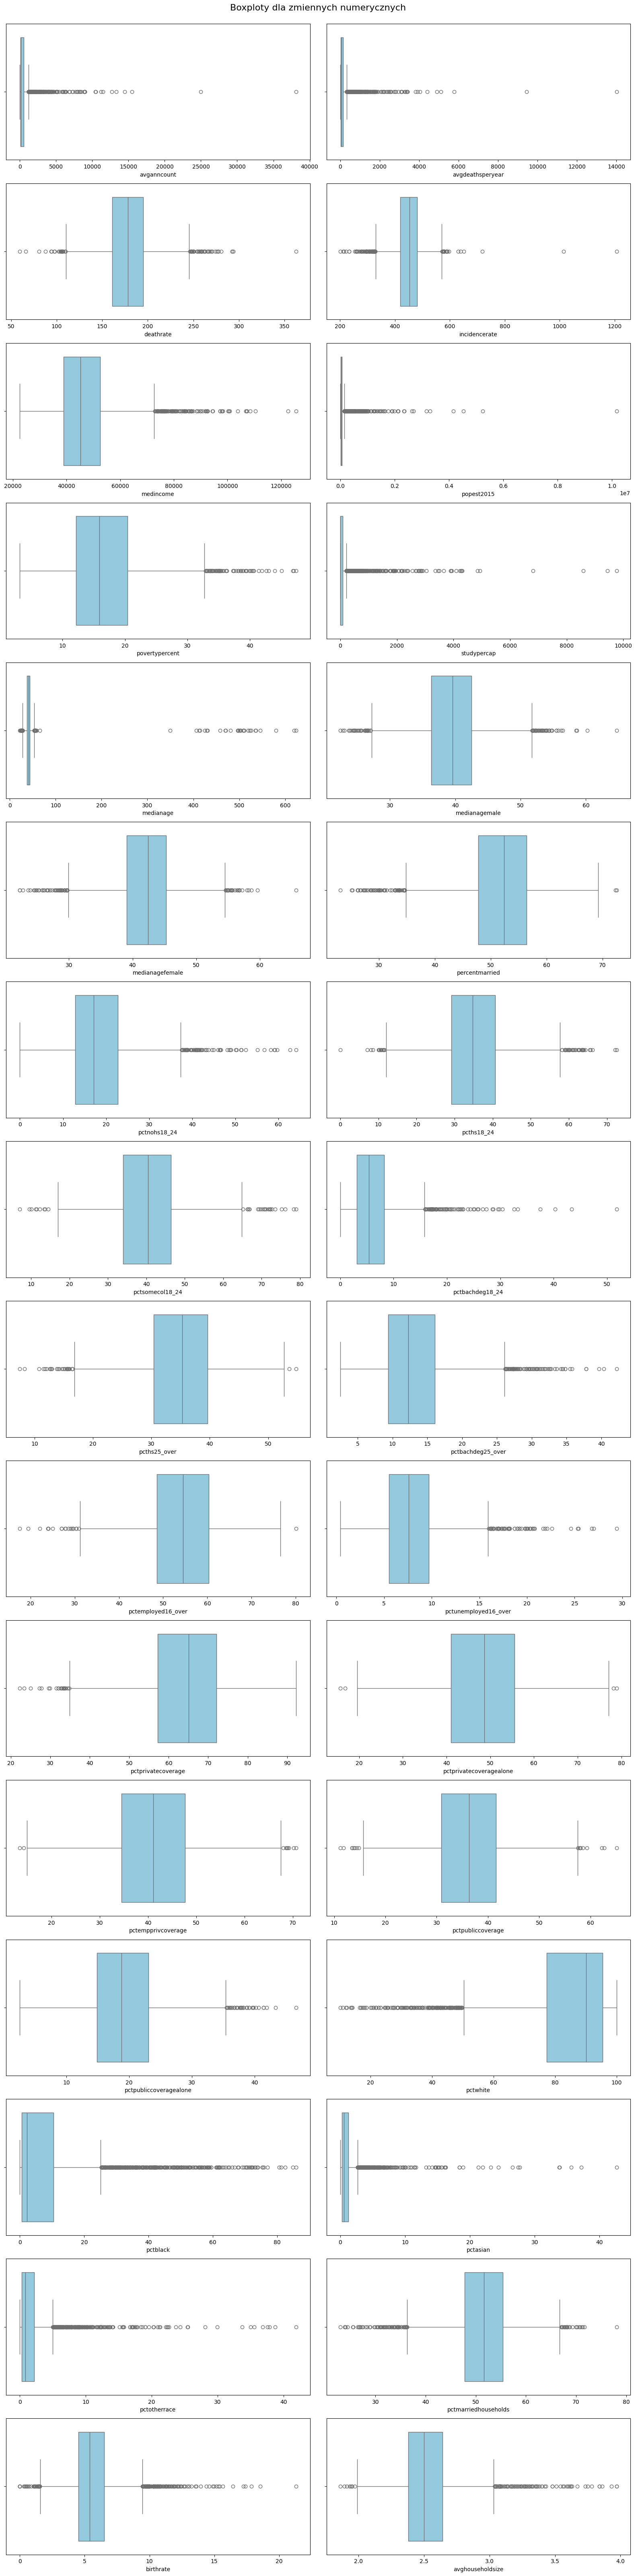

In [18]:
plots_per_row = 2
num_plots = len(numerical_columns)
num_rows = (num_plots + plots_per_row - 1) // plots_per_row 

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, 4 * num_rows))

axes = axes.flatten() if num_rows > 1 else [axes]

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i], color='skyblue')
#     axes[i].set_title(column, fontsize=10)

for i in range(num_plots, len(axes)):
    axes[i].axis('off')

fig.suptitle("Boxploty dla zmiennych numerycznych", fontsize=16, y=1)

plt.tight_layout()
plt.show()


**Interpretation of the Charts:**
1. `avganncount`, `avgdeathsperyear`:
Few regions with extremely high values may indicate metropolitan areas or large populations.
2. `deathrate`, `incidencerate`:
The distribution of the mortality rate is close to normal, which may indicate consistency between regions. The distribution of the incidence rate (`incidencerate`) has a similar trend but with greater data dispersion.
3. `medincome`, `povertypercent`:
Income has a skewed distribution, where most regions have a median income below $50,000.
The percentage of people living below the poverty line is inversely correlated with income. Most regions have a poverty rate below 20%.
4. `popest2015`:
The population is highly varied, with a few regions having extremely large populations.
5. `studypercap`:
Most regions do not conduct many clinical studies per capita, indicating significant differences in access to research.
6. `medianage`, `medianagemale`, `medianagefemale`:
The distributions of median age (`medianagemale`, `medianagefemale`) are symmetrical, similar to each other, indicating demographic consistency. Based on the charts for `medianage`, it can be concluded that there are unnaturally high values that are data errors. According to real demographics, values should be between 20 and 60 years.
7. `pctnohs18_24`, `pcths18_24`, `pctbachdeg18_24`:
The distributions show significant differences in education levels.
8. `pctprivatecoverage`, `pctprivatecoveragealone`, `pctempprivcoverage`:
The distributions are symmetrical, resembling a normal distribution.
Most regions have a private insurance rate in the range of 40–70%, indicating a significant role of private health insurance.
9. `pctpubliccoverage`, `pctpubliccoveragealone`:
The distributions are symmetrical but with a smaller standard deviation compared to private insurance.
Most regions have a public insurance rate in the range of 20–50%, and `pctpubliccoveragealone` is narrower, meaning many people combine public and private insurance.
10. `pctwhite`, `pctblack`, `pctasian`, `pctotherrace`:
`pctwhite`: The distribution is strongly skewed, with most regions having over 80% white population.
`pctblack`: Most regions have less than 10% Black population, but there are regions where this rate is up to 80%.
`pctasian` and `pctotherrace`: Strongly skewed, with very low values in most regions.
11. `pctmarriedhouseholds`:
Symmetrical distribution, with most values in the range of 40–70%.
12. `birthrate`:
The distribution resembles a normal distribution, with an average value around 5 births per 1,000 people. Regions have a relatively low birth rate.
13. `avghouseholdsize`:
Symmetrical distribution, with most regions having an average household size of 2.5 people. Typical households are thus small, which may correlate with demographic trends, such as a declining birth rate.

#### Correcting Unnatural Values in the `medianage` Column

In [19]:
df['medianage'].describe()

count    3047.000000
mean       45.272333
std        45.304480
min        22.300000
25%        37.700000
50%        41.000000
75%        44.000000
max       624.000000
Name: medianage, dtype: float64

In [20]:
anomalies = df[df['medianage'] > 100]

print("Rekordy z nienaturalnymi wartościami medianage:")
print(anomalies['medianage'])

Rekordy z nienaturalnymi wartościami medianage:
100     458.4
181     469.2
225     546.0
318     624.0
425     508.8
606     619.2
637     498.0
843     412.8
991     481.2
1199    424.8
1312    535.2
1406    406.8
1579    579.6
1725    502.8
1736    496.8
1744    525.6
1767    519.6
1855    536.4
2000    523.2
2108    470.4
2132    430.8
2391    414.0
2422    500.4
2431    429.6
2589    501.6
2668    496.8
2789    349.2
2835    511.2
2895    498.0
2966    508.8
Name: medianage, dtype: float64


The median age for all regions is around 40 years, so it can be inferred that the data was entered incorrectly. The problem may be due to an incorrect order of magnitude, and the erroneous data should be divided by 10.

In [21]:
df.loc[df['medianage'] > 100, 'medianage'] = df['medianage'] / 10

In [22]:
df['medianage'].describe()

count    3047.000000
mean       40.906964
std         5.271319
min        22.300000
25%        37.700000
50%        41.000000
75%        43.900000
max        65.300000
Name: medianage, dtype: float64

Before removing anomalies, the average value of the `medianage` column was 45.27, and the maximum was 624, indicating the presence of unnaturally large values. After removing anomalies, the average dropped to 40.91, and the maximum value is 65.3, which better reflects a realistic range of median ages.

## 4. Data Completeness <a name="completeness"></a>

In [23]:
missing_data = df.isnull().sum()
print(missing_data)

avganncount                   0
avgdeathsperyear              0
deathrate                     0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [24]:
columns_with_missing = missing_data[missing_data > 0].index.tolist()
print("Columns with missing data:", columns_with_missing)

Columns with missing data: ['pctsomecol18_24', 'pctemployed16_over', 'pctprivatecoveragealone']


In [25]:
missing_percentage = round((missing_data / len(df)) * 100, 2)
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)


pctsomecol18_24            74.99
pctemployed16_over          4.99
pctprivatecoveragealone    19.99
dtype: float64


As can be seen, the column **pctsomecol18_24** (Percentage of residents aged 18–24 with some college education) contains almost 75% empty data. In this situation, this column should be omitted from further analysis, as with such data gaps, we will not be able to use this column in the regression model.

The column **pctprivatecoveragealone** also has large data gaps, at almost 20%. Gaps at this level would complicate the analysis. Additionally, the variable **pctprivatecoveragealone** is strongly linearly correlated (correlation coefficient 0.93) with the variable **pctprivatecoverage**, so it would not provide much valuable information. For both these reasons, we will also remove this column.


In [26]:
df.drop(["pctprivatecoveragealone", "pctsomecol18_24"], axis=1, inplace=True)

The column **pctemployed16_over** (percentage of residents aged 16 and over who are employed) has gaps at the level of 5%. Let's take a closer look at this column:

In [27]:
df["pctemployed16_over"].describe()

count    2895.000000
mean       54.152642
std         8.315064
min        17.600000
25%        48.600000
50%        54.500000
75%        60.300000
max        80.100000
Name: pctemployed16_over, dtype: float64

As can be seen, the distribution is relatively symmetrical (mean ≈ median). Filling the data with the median seems to be a reasonable option in this case, as it will not result in data loss and will not significantly affect the stability of a potential regression model.

In [28]:
df['pctemployed16_over'].fillna(df['pctemployed16_over'].median(), inplace=True)

/var/folders/tr/42w8vtg94rs0pknlcn5lz8r40000gn/T/ipykernel_32507/3151459469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pctemployed16_over'].fillna(df['pctemployed16_over'].median(), inplace=True)


Checking the number of missing data:

In [29]:
n_missing_data = df.isnull().sum().sum()
print(n_missing_data)

0


## 5. Visualizations <a name="visualizations"></a>

As previously established, the variables most strongly linearly correlated with `deathrate` are related to education level, type of insurance, income, and poverty, so let's take a closer look at these relationships.

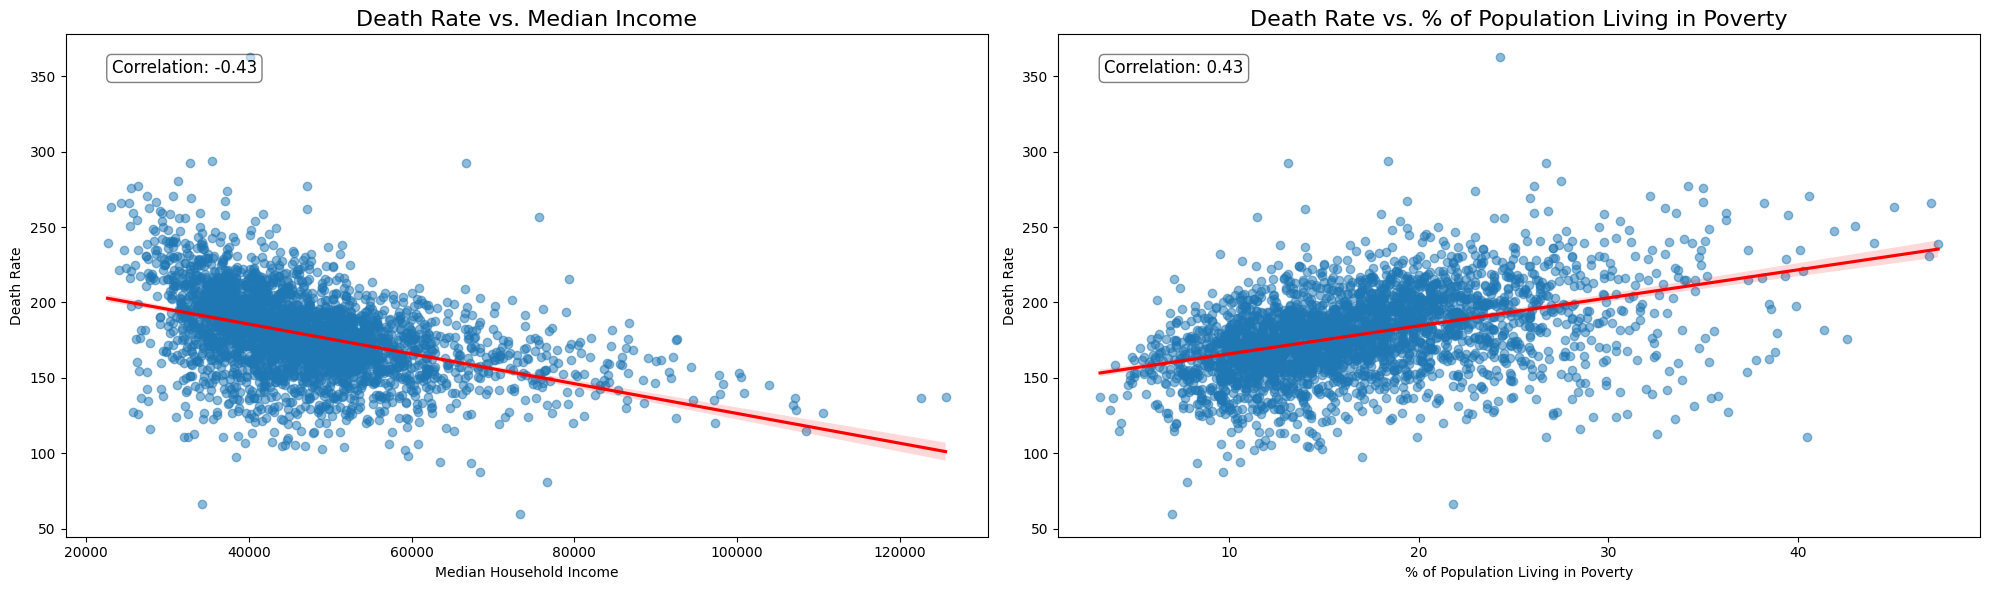

In [30]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 2, 1)
sns.regplot(x='medincome', y='deathrate', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax1)
plt.title('Death Rate vs. Median Income', fontsize=16)
plt.xlabel('Median Household Income')
plt.ylabel('Death Rate')
corr_medincome_deathrate = corr_matrix.loc['medincome', 'deathrate']
ax1.text(0.05, 0.95, f'Correlation: {corr_medincome_deathrate:.2f}', transform=ax1.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

ax2 = plt.subplot(1, 2, 2)
sns.regplot(x='povertypercent', y='deathrate', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax2)
plt.title('Death Rate vs. % of Population Living in Poverty', fontsize=16)
plt.xlabel('% of Population Living in Poverty')
plt.ylabel('Death Rate')
corr_povertypercent_deathrate = corr_matrix.loc['povertypercent', 'deathrate']
ax2.text(0.05, 0.95, f'Correlation: {corr_povertypercent_deathrate:.2f}', transform=ax2.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()



Significant linear relationships are visible. However, the data is very concentrated for smaller values of income and % of population living in poverty, while for larger values, the data is more dispersed, which may negatively affect the precision of potential model predictions for larger values of these variables.

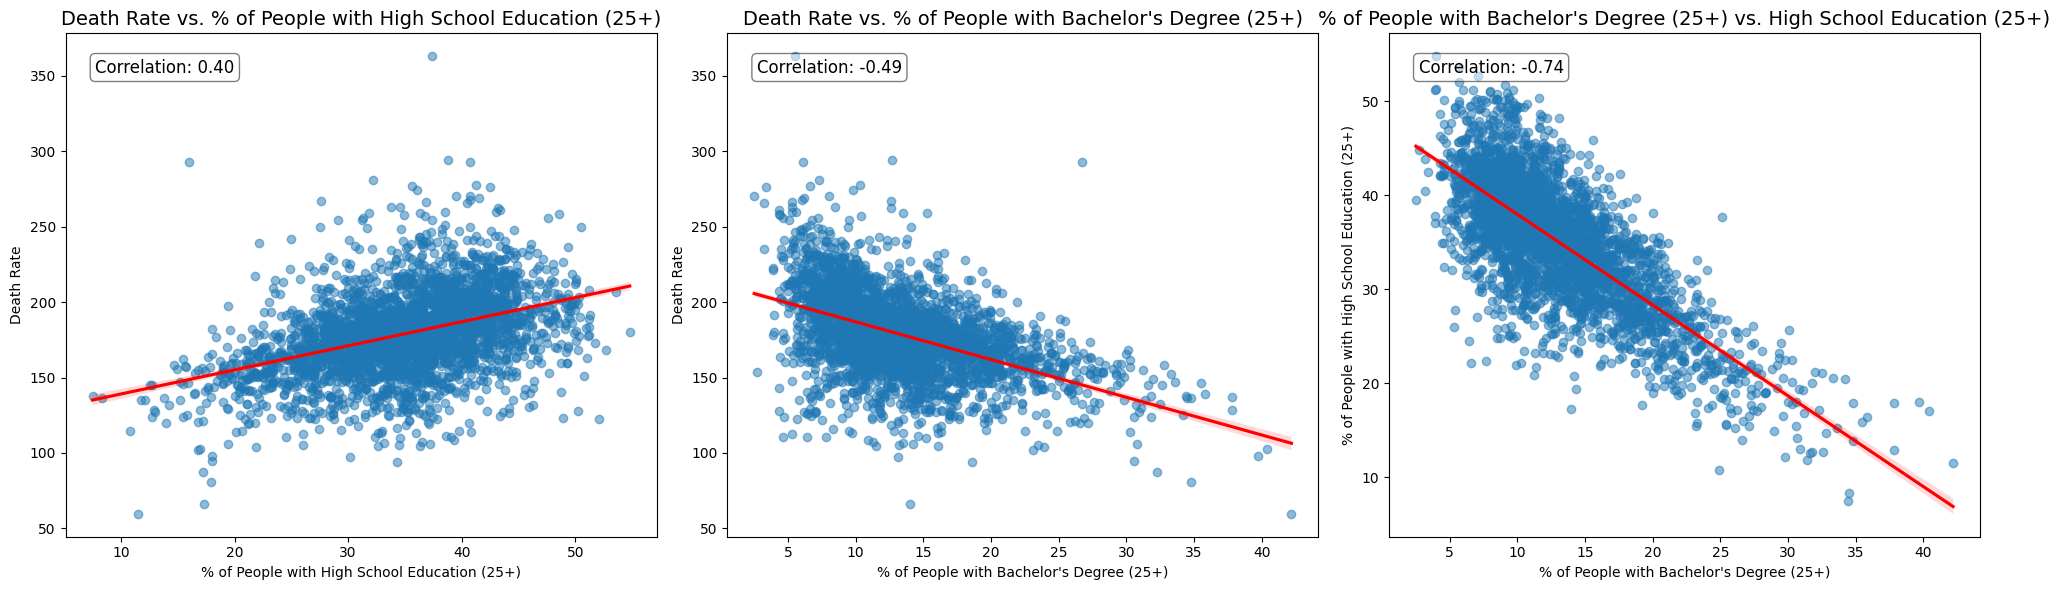

In [31]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
sns.regplot(x='pcths25_over', y='deathrate', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax1)
corr_pcths25_over_deathrate = corr_matrix.loc['pcths25_over', 'deathrate']
ax1.text(0.05, 0.95, f'Correlation: {corr_pcths25_over_deathrate:.2f}', transform=ax1.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Death Rate vs. % of People with High School Education (25+)', fontsize=14)
plt.xlabel('% of People with High School Education (25+)')
plt.ylabel('Death Rate')

ax2 = plt.subplot(1, 3, 2)
sns.regplot(x='pctbachdeg25_over', y='deathrate', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax2)
corr_pctbachdeg25_over_deathrate = corr_matrix.loc['pctbachdeg25_over', 'deathrate']
ax2.text(0.05, 0.95, f'Correlation: {corr_pctbachdeg25_over_deathrate:.2f}', transform=ax2.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Death Rate vs. % of People with Bachelor\'s Degree (25+)', fontsize=14)
plt.xlabel('% of People with Bachelor\'s Degree (25+)')
plt.ylabel('Death Rate')

ax3 = plt.subplot(1, 3, 3)
sns.regplot(x='pctbachdeg25_over', y='pcths25_over', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax3)
corr_pctbachdeg25_over_pcths25_over = corr_matrix.loc['pctbachdeg25_over', 'pcths25_over']
ax3.text(0.05, 0.95, f'Correlation: {corr_pctbachdeg25_over_pcths25_over:.2f}', transform=ax3.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('% of People with Bachelor\'s Degree (25+) vs. High School Education (25+)', fontsize=14)
plt.xlabel('% of People with Bachelor\'s Degree (25+)')
plt.ylabel('% of People with High School Education (25+)')

plt.tight_layout()
plt.show()


A higher percentage of high school education may be associated with a higher death rate, while a higher percentage of people with a bachelor's degree may be associated with a lower death rate.
The percentage of people aged 25 and over with a bachelor's degree and the percentage of people aged 25 and over with a high school education are negatively correlated, with a correlation coefficient of -0.74. This is a natural relationship - the higher the share of people with a high school education in the population, the lower the share of people with a bachelor's degree will be.


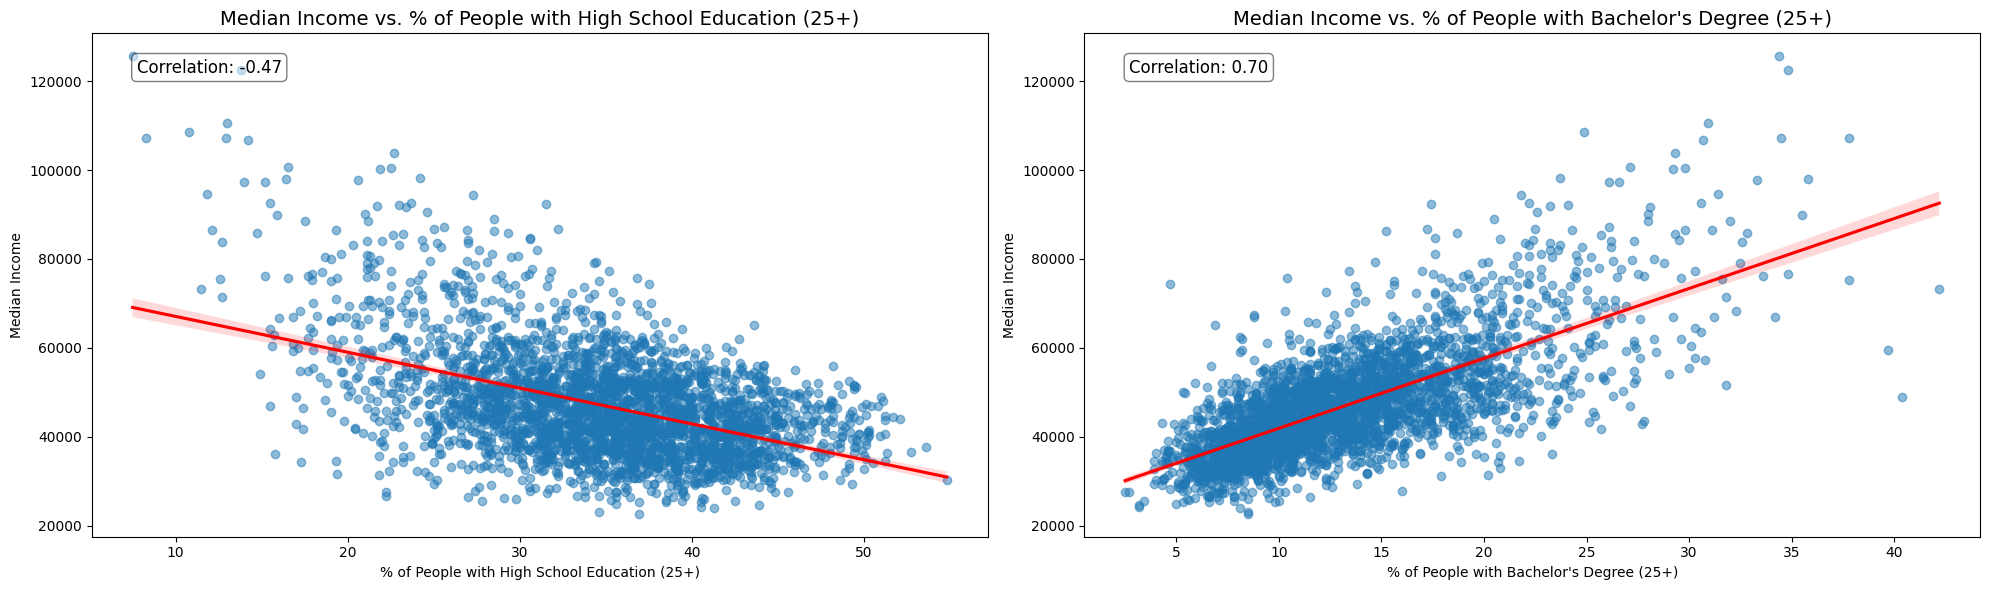

In [34]:
plt.figure(figsize=(20, 6))

ax4 = plt.subplot(1, 2, 1)
sns.regplot(x='pcths25_over', y='medincome', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax4)
corr_pcths25_over_medincome = corr_matrix.loc['pcths25_over', 'medincome']
ax4.text(0.05, 0.95, f'Correlation: {corr_pcths25_over_medincome:.2f}', transform=ax4.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Median Income vs. % of People with High School Education (25+)', fontsize=14)
plt.xlabel('% of People with High School Education (25+)')
plt.ylabel('Median Income')

ax5 = plt.subplot(1, 2, 2)
sns.regplot(x='pctbachdeg25_over', y='medincome', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax5)
corr_pctbachdeg25_over_medincome = corr_matrix.loc['pctbachdeg25_over', 'medincome']
ax5.text(0.05, 0.95, f'Correlation: {corr_pctbachdeg25_over_medincome:.2f}', transform=ax5.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Median Income vs. % of People with Bachelor\'s Degree (25+)', fontsize=14)
plt.xlabel('% of People with Bachelor\'s Degree (25+)')
plt.ylabel('Median Income')

plt.tight_layout()
plt.show()

As can be seen, a higher percentage of people with a high school education is associated with lower median income, while a higher percentage of people with a bachelor's degree is associated with higher median income. For the percentage of high school education, the data is more concentrated in the middle range of values, while for the percentage of people with a bachelor's degree, the data is concentrated in the lower range of values. This suggests a numerical advantage of people with a high school education in the population.

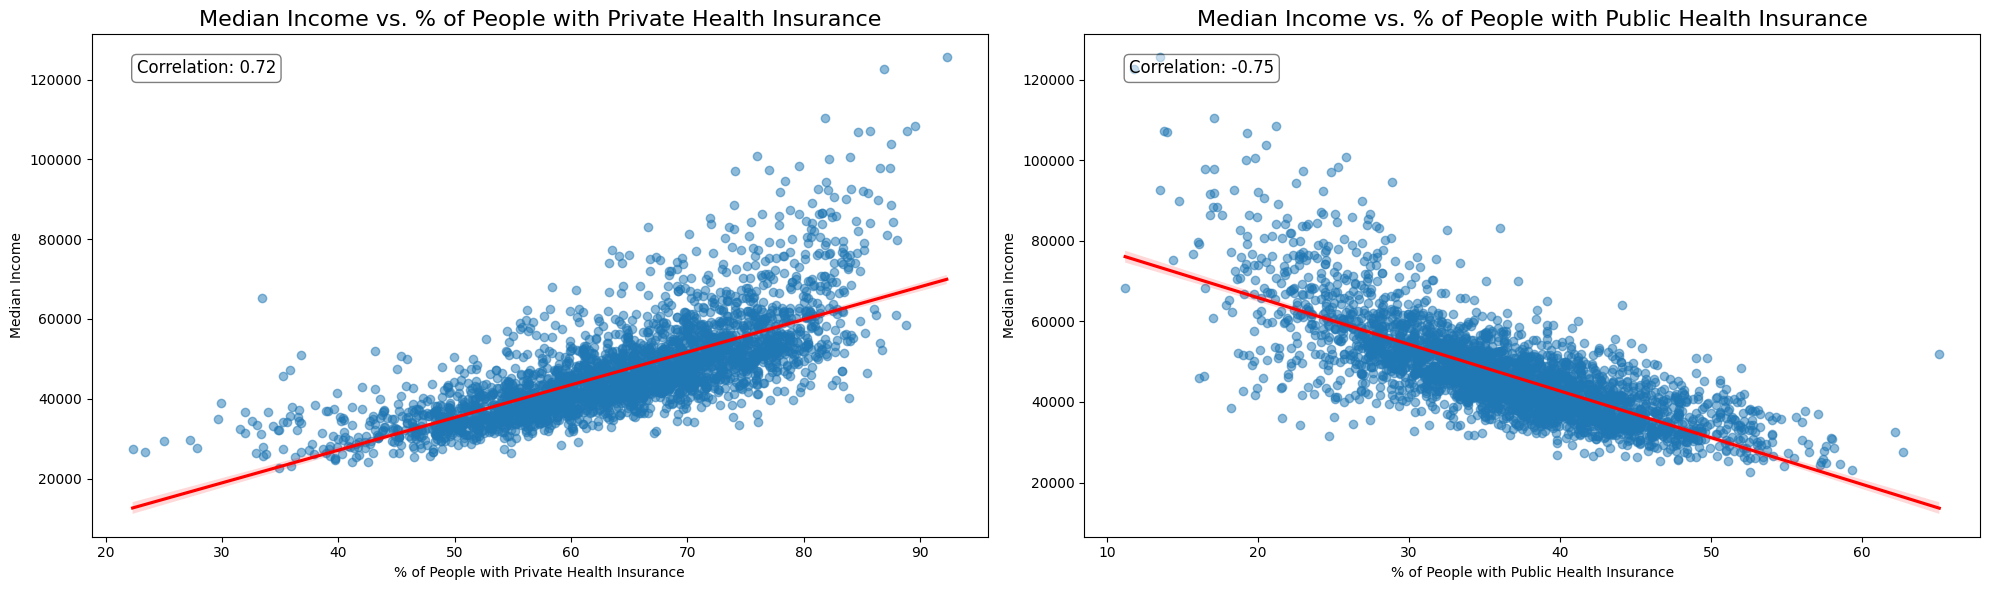

In [35]:
plt.figure(figsize=(20, 6))

ax6 = plt.subplot(1, 2, 1)
sns.regplot(x='pctprivatecoverage', y='medincome', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax6)
corr_pctprivatecoverage_medincome = corr_matrix.loc['pctprivatecoverage', 'medincome']
ax6.text(0.05, 0.95, f'Correlation: {corr_pctprivatecoverage_medincome:.2f}', transform=ax6.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Median Income vs. % of People with Private Health Insurance', fontsize=16)
plt.xlabel('% of People with Private Health Insurance')
plt.ylabel('Median Income')

ax7 = plt.subplot(1, 2, 2)
sns.regplot(x='pctpubliccoverage', y='medincome', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax7)
corr_pctpubliccoverage_medincome = corr_matrix.loc['pctpubliccoverage', 'medincome']
ax7.text(0.05, 0.95, f'Correlation: {corr_pctpubliccoverage_medincome:.2f}', transform=ax7.transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Median Income vs. % of People with Public Health Insurance', fontsize=16)
plt.xlabel('% of People with Public Health Insurance')
plt.ylabel('Median Income')

plt.tight_layout()
plt.show()

As can be seen, higher median income is associated with a higher percentage of people with private health insurance, while in the case of the percentage with public health insurance, the relationship is inverse. The data is scattered over a wide range of values.

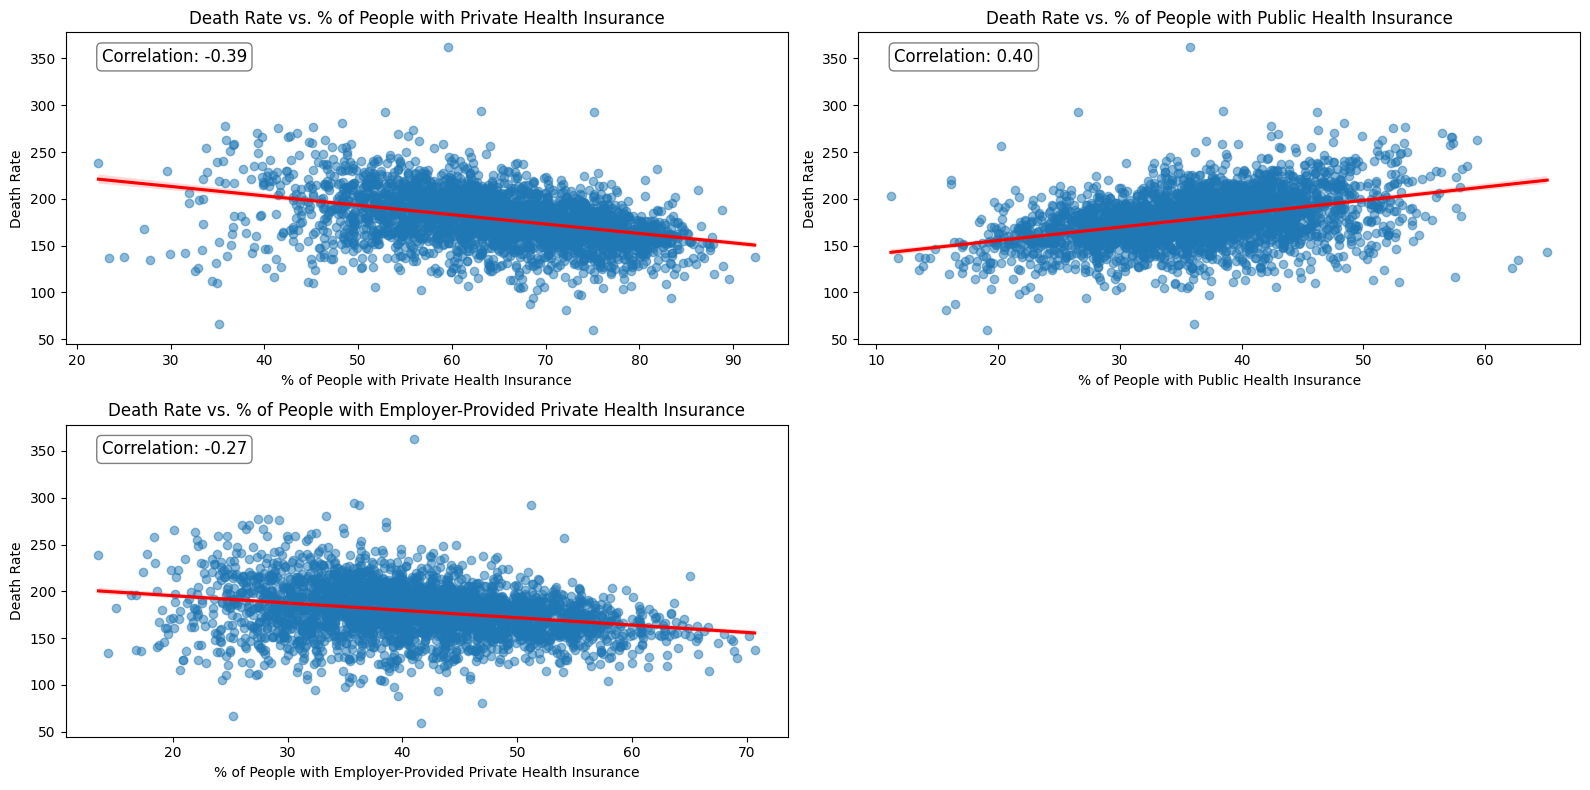

In [36]:
insurance_columns = ['pctprivatecoverage', 'pctpubliccoverage', 'pctempprivcoverage']
col_names = ['% of People with Private Health Insurance', '% of People with Public Health Insurance', '% of People with Employer-Provided Private Health Insurance']

plt.figure(figsize=(16, 8))

for i, col in enumerate(insurance_columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.regplot(x=df[col], y='deathrate', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax)
    corr_value = corr_matrix.loc[col, 'deathrate']
    ax.text(0.05, 0.95, f'Correlation: {corr_value:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    plt.title(f'Death Rate vs. {col_names[i]}')
    plt.xlabel(col_names[i])
    plt.ylabel('Death Rate')

plt.tight_layout()
plt.show()

A higher share of private insurance is associated with a lower death rate, while in the case of public insurance, it is the opposite. The data is evenly scattered over wide ranges of values.

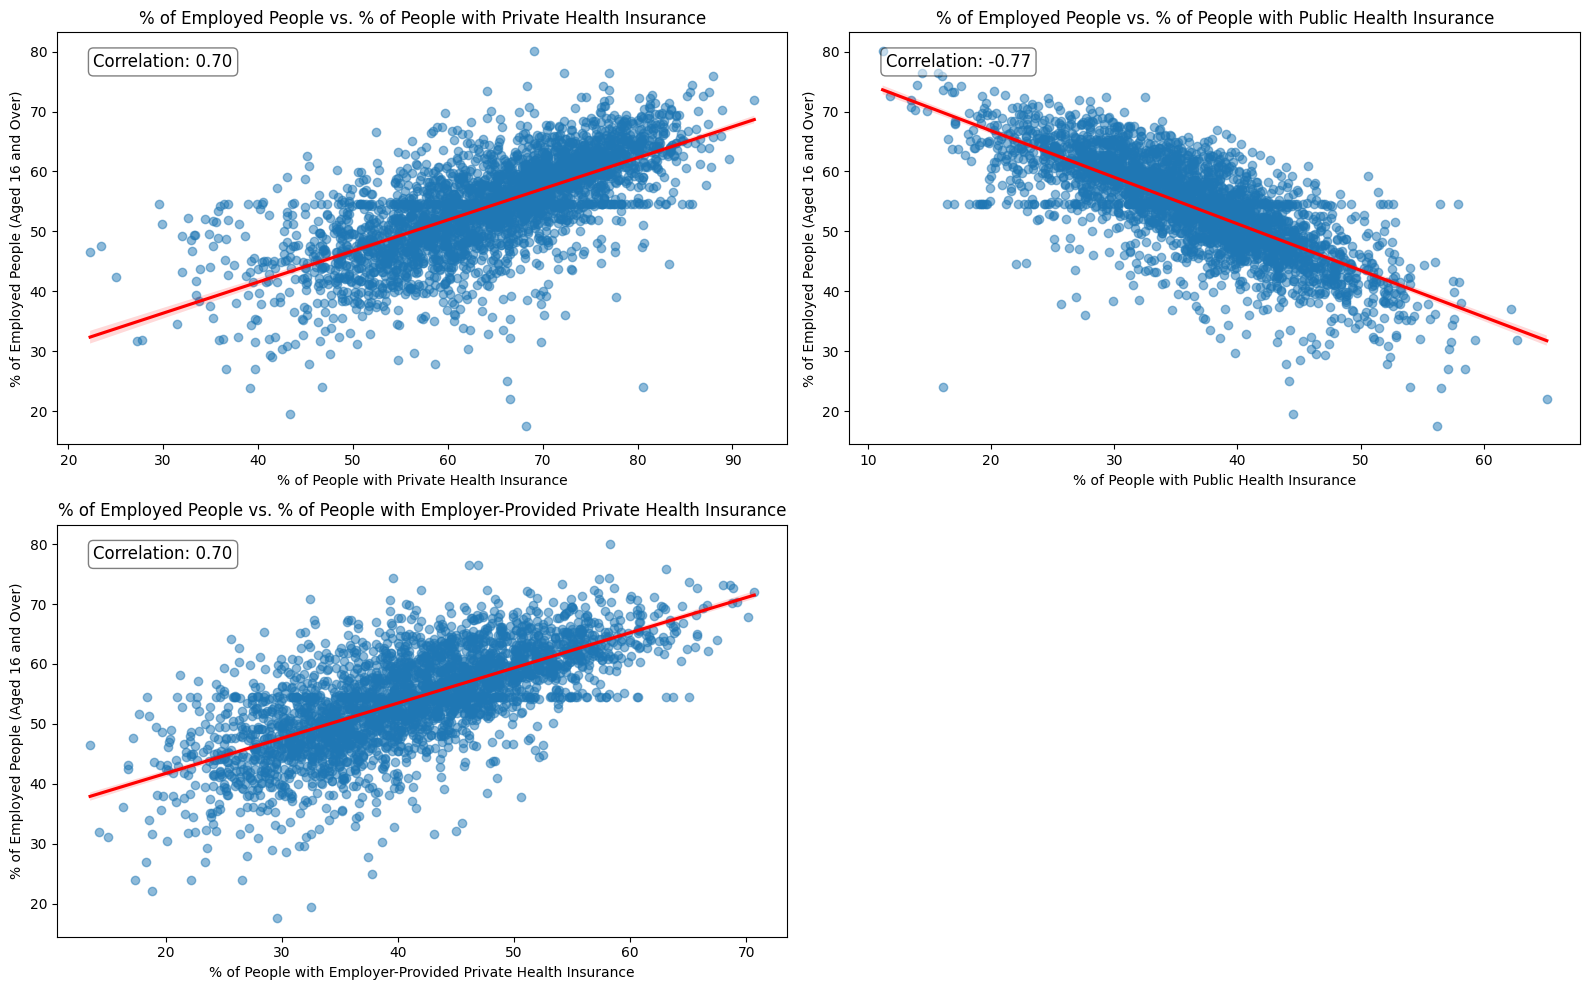

In [37]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(insurance_columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.regplot(x=df[col], y='pctemployed16_over', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax)
    corr_value = corr_matrix.loc[col, 'pctemployed16_over']
    ax.text(0.05, 0.95, f'Correlation: {corr_value:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    plt.title(f'% of Employed People vs. {col_names[i]}')
    plt.xlabel(col_names[i])
    plt.ylabel('% of Employed People (Aged 16 and Over)')

plt.tight_layout()
plt.show()

The higher the percentage of employed people in the population, the higher the percentage of people with private insurance, and the same is true for employer-provided private insurance. On the other hand, the lower the percentage of employed people, the higher the percentage of people with public health insurance. The percentage of people with private insurance and the percentage of people with public insurance are strongly negatively correlated (correlation coefficient -0.72).

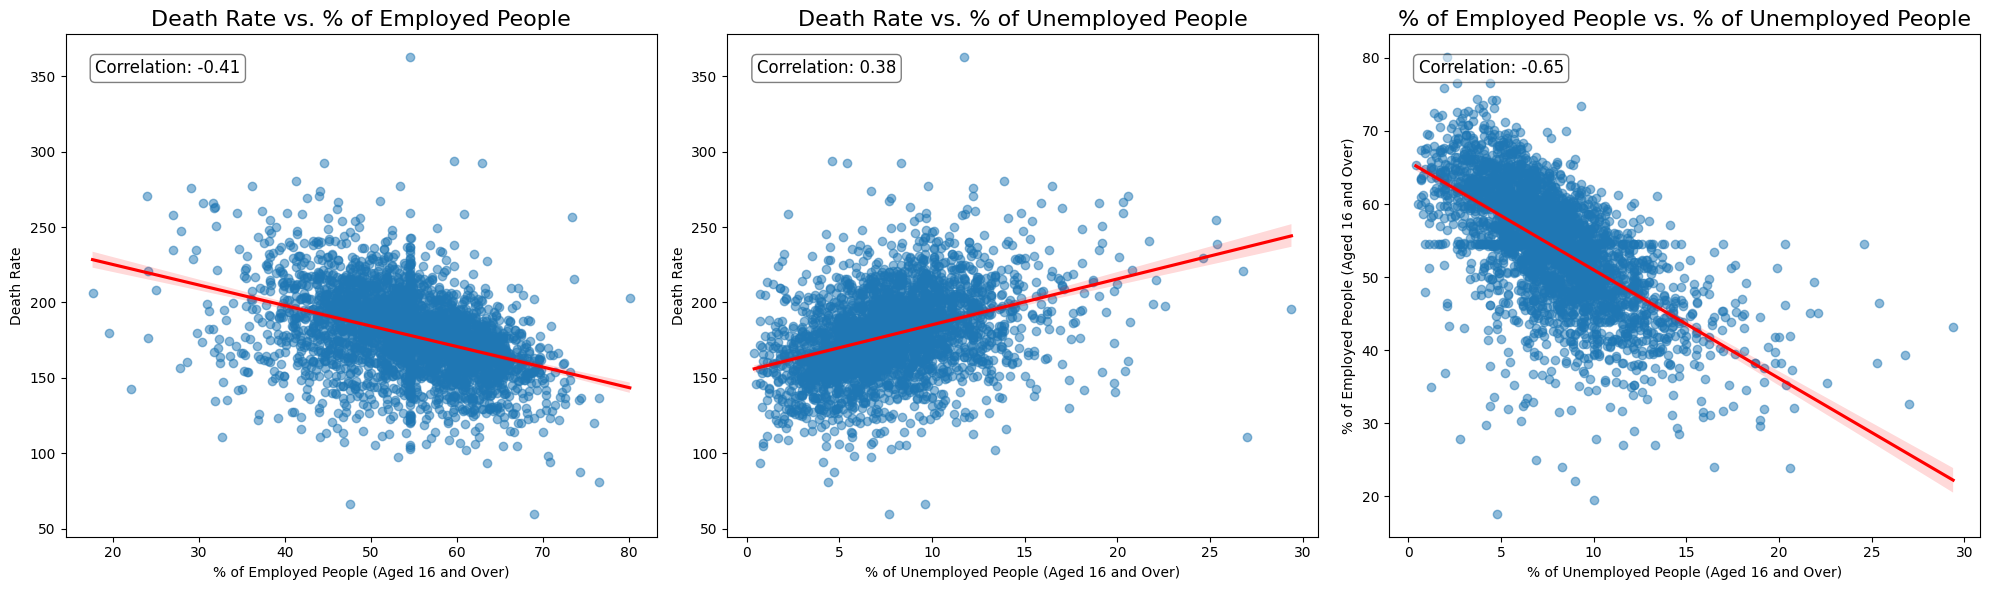

In [38]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
sns.regplot(x='pctemployed16_over', y='deathrate', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax1)
corr_value1 = corr_matrix.loc['pctemployed16_over', 'deathrate']
ax1.text(0.05, 0.95, f'Correlation: {corr_value1:.2f}', transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Death Rate vs. % of Employed People', fontsize=16)
plt.xlabel('% of Employed People (Aged 16 and Over)')
plt.ylabel('Death Rate')

ax2 = plt.subplot(1, 3, 2)
sns.regplot(x='pctunemployed16_over', y='deathrate', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax2)
corr_value2 = corr_matrix.loc['pctunemployed16_over', 'deathrate']
ax2.text(0.05, 0.95, f'Correlation: {corr_value2:.2f}', transform=ax2.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Death Rate vs. % of Unemployed People', fontsize=16)
plt.xlabel('% of Unemployed People (Aged 16 and Over)')
plt.ylabel('Death Rate')

ax3 = plt.subplot(1, 3, 3)
sns.regplot(x='pctunemployed16_over', y='pctemployed16_over', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax3)
corr_value3 = corr_matrix.loc['pctunemployed16_over', 'pctemployed16_over']
ax3.text(0.05, 0.95, f'Correlation: {corr_value3:.2f}', transform=ax3.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('% of Employed People vs. % of Unemployed People', fontsize=16)
plt.xlabel('% of Unemployed People (Aged 16 and Over)')
plt.ylabel('% of Employed People (Aged 16 and Over)')

plt.tight_layout()
plt.show()

The higher the percentage of employed people, the lower the death rate, while a higher unemployment rate is associated with a higher death rate. The strong negative correlation between the percentage of employed and unemployed people is a logical reflection of their mutual exclusivity.


We will create a function that will allow us to better see how individual variables are distributed geographically:

In [44]:
def plot_usa_state_data(variable, colormap="YlOrBr", title="USA Map", legend_label="Indicator", figsize=(18, 14)):
    """
    Creates a USA map divided into states, coloring them based on the value of the variable.

    Parameters:
    - variable: Name of the variable to visualize on the map.
    - colormap: Name of the color scale (default "YlOrBr").
    - title: Map title.
    - legend_label: Legend description.
    - figsize: Figure size (tuple, default (18, 14)).
    """
    gdf = gpd.read_file(os.path.join(os.getcwd(), 'cb_2018_us_state_500k'))

    state_data = df.groupby('statefips', as_index=False)[variable].mean()
    state_data['statefips'] = state_data['statefips'].apply(lambda x: f"{int(x):02d}")
    gdf = gdf.merge(state_data, left_on='STATEFP', right_on='statefips')

    def makeColorColumn(gdf, variable, vmin, vmax, cmap):
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
        mapper = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
        return gdf

    vmin, vmax = gdf[variable].min(), gdf[variable].max()
    gdf = makeColorColumn(gdf, variable, vmin, vmax, colormap)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.axis('off')
    ax.set_title(title, fontsize=24, fontweight='bold')

    for _, row in gdf.iterrows():
        if row['STUSPS'] not in ['HI', 'AK']:
            gdf[gdf['STUSPS'] == row['STUSPS']].plot(
                ax=ax,
                color=row['value_determined_color'],
                edgecolor='k'
            )

    akax = fig.add_axes([0.1, 0.17, 0.2, 0.19]) 
    akax.axis('off')
    polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
    alaska = gdf[gdf['STUSPS'] == 'AK']
    alaska.clip(polygon).plot(
        ax=akax,
        color=alaska['value_determined_color'].iloc[0],
        edgecolor='k'
    )

    hiax = fig.add_axes([0.28, 0.20, 0.1, 0.1]) 
    hiax.axis('off')
    hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
    hawaii = gdf[gdf['STUSPS'] == 'HI']
    hawaii.clip(hipolygon).plot(
        ax=hiax,
        color=hawaii['value_determined_color'].iloc[0],
        edgecolor='k'
    )

    cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31]) 
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cbax)
    cbar.set_label(legend_label, fontsize=14)

    plt.show()

The geometry files for USA source: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

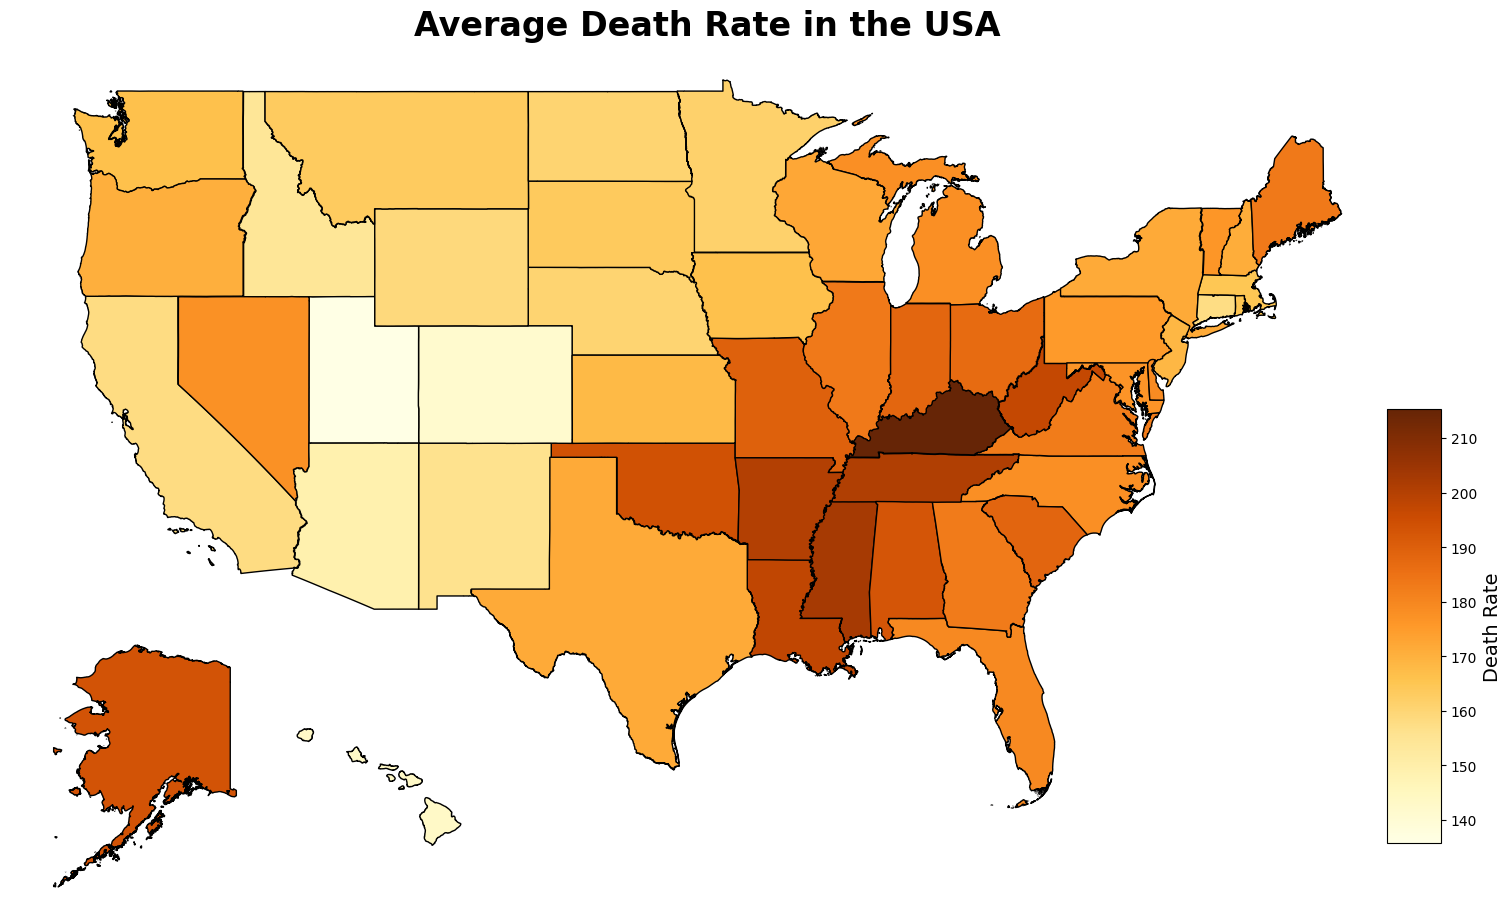

In [45]:
plot_usa_state_data(
    variable='deathrate',
    colormap="YlOrBr",
    title="Average Death Rate in the USA",
    legend_label="Death Rate"
)

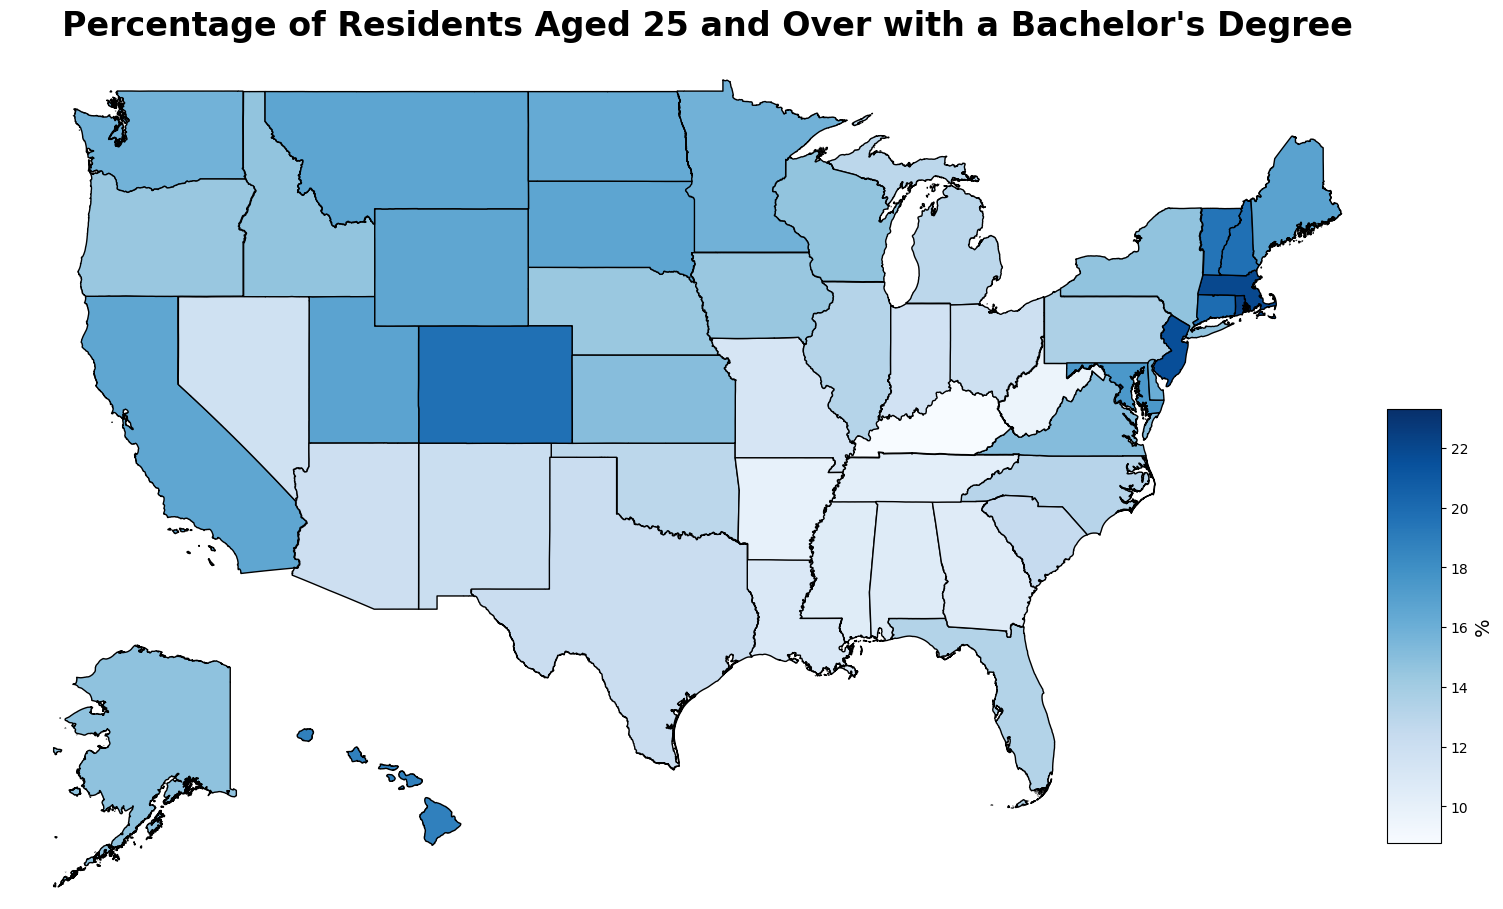

In [46]:
plot_usa_state_data(
    variable='pctbachdeg25_over',
    colormap="Blues",
    title="Percentage of Residents Aged 25 and Over with a Bachelor's Degree",
    legend_label="%"
)

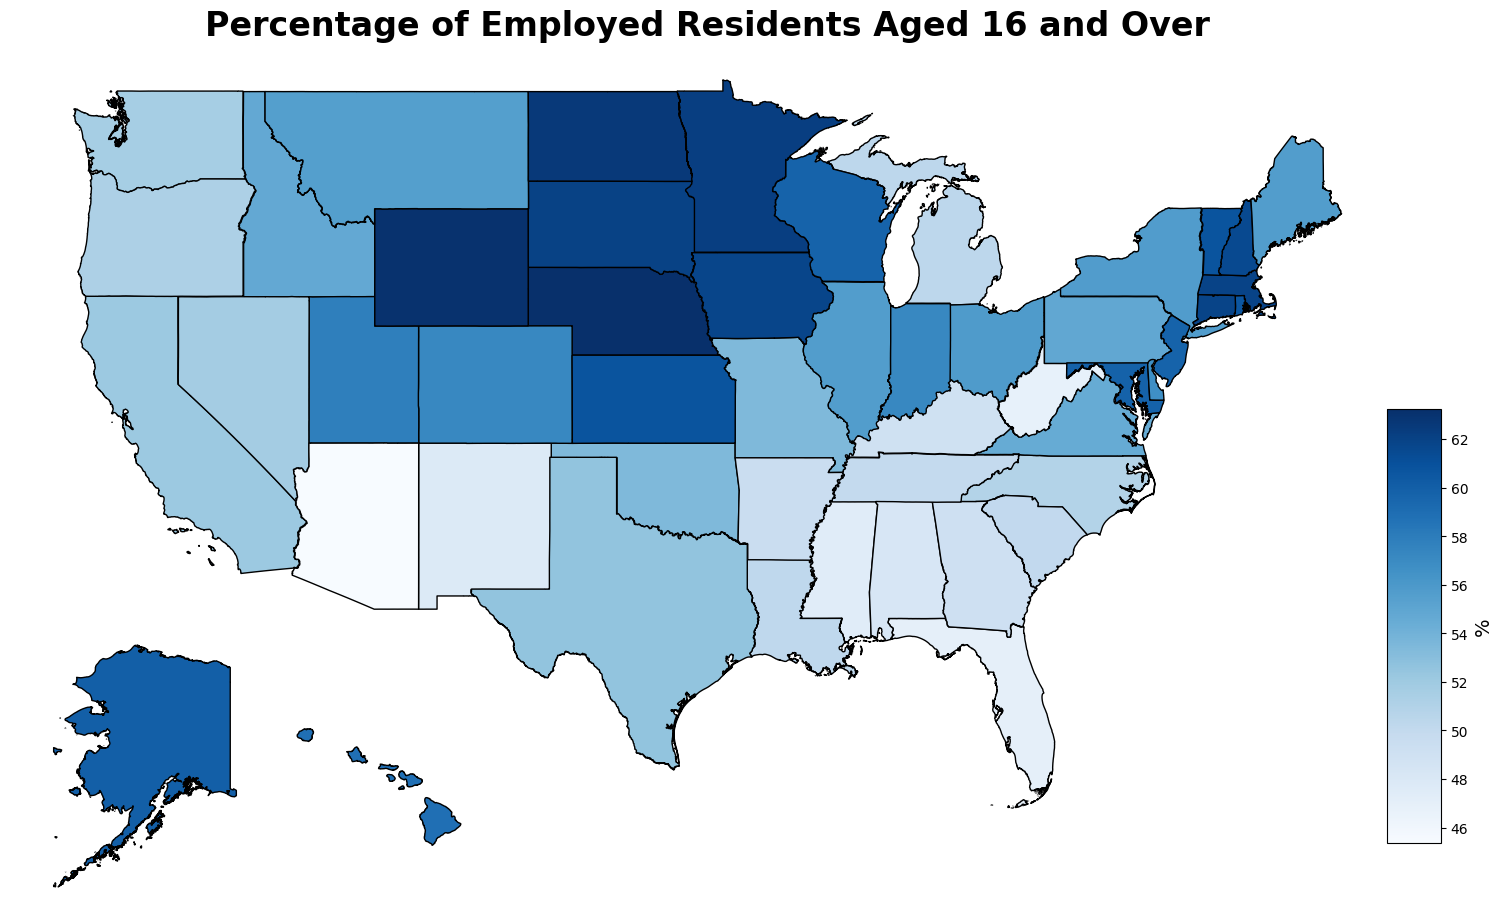

In [47]:
plot_usa_state_data(
    variable='pctemployed16_over',
    colormap="Blues",
    title="Percentage of Employed Residents Aged 16 and Over",
    legend_label="%"
)

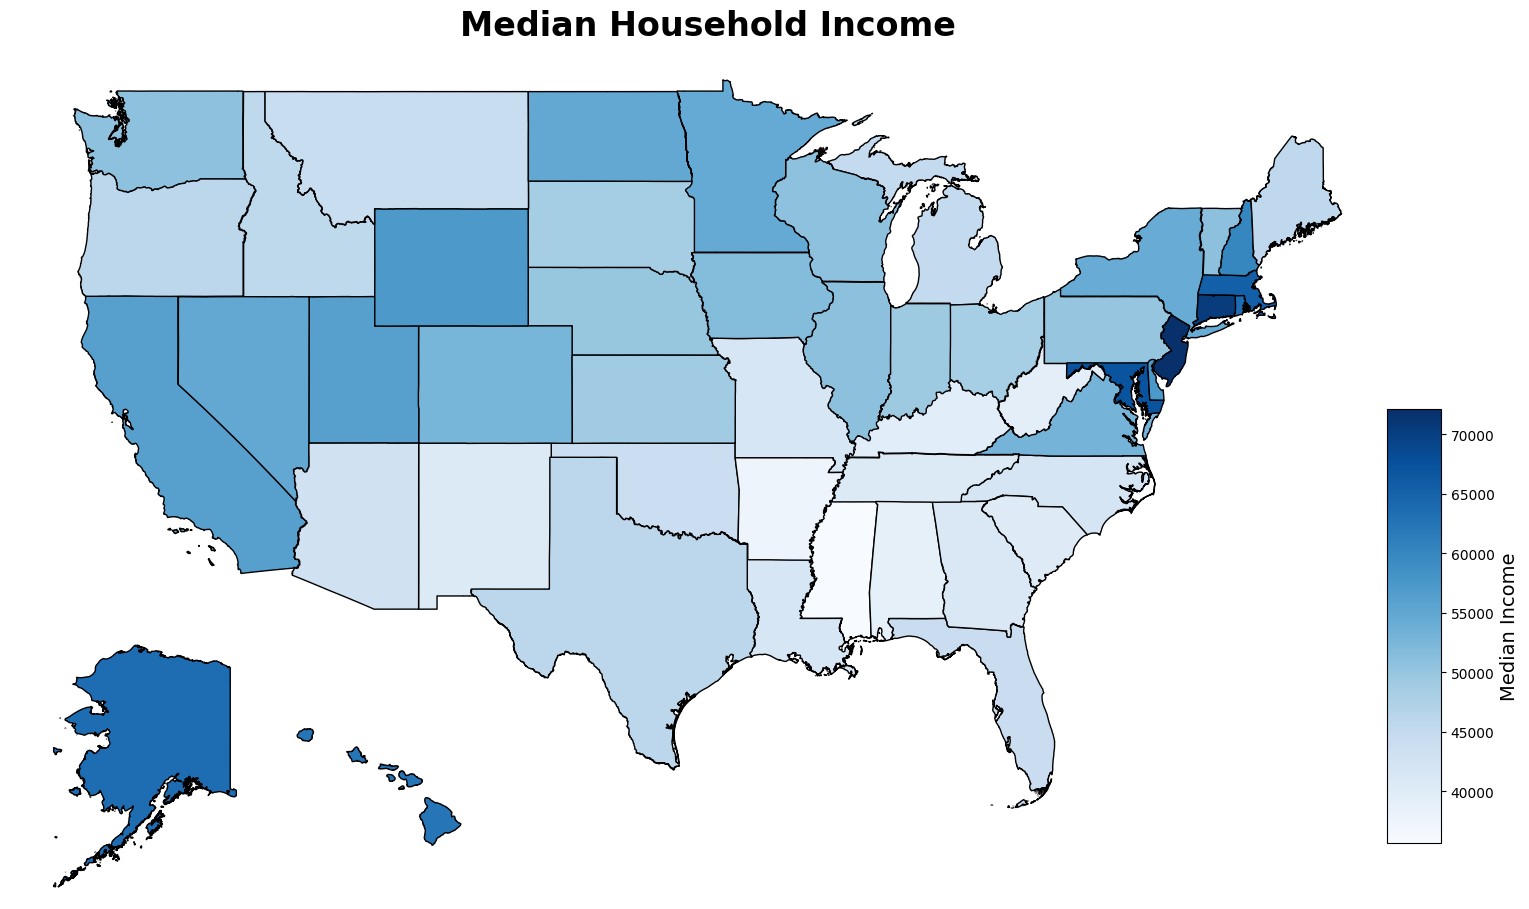

In [48]:
plot_usa_state_data(
    variable='medincome',
    colormap="Blues",
    title="Median Household Income",
    legend_label="Median Income"
)

It can be seen that where the death rate was high, the other indicators shown on the maps are generally lower.

### Research Hypothesis

An increase in the death rate due to malignant tumors is associated with lower median household income, a lower percentage of people with a bachelor's degree, a higher percentage of the population living below the poverty line, a higher percentage of unemployed people, and a higher percentage of people using public health insurance.

A possible explanation is as follows: a low level of education limits employment opportunities and affects lower incomes. Lower incomes limit access to private health insurance, which reduces the quality of healthcare and increases the risk of death. This relationship indicates a multi-stage impact of educational and economic factors on public health.

Strong linear correlations (even above 0.7) between some of these variables may negatively affect the performance of the regression model, so it will likely be necessary to perform variable selection—for example, using multicollinearity analysis (VIF) or automatic feature reduction algorithms.